In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Clustering K-means

In [3]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

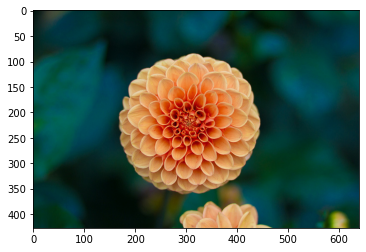

In [4]:
flower=load_sample_image('flower.jpg')
flower=np.array(flower,dtype=np.float64)/255
plt.imshow(flower)

In [6]:
# change image to a 2d matrix
w,h,d=original_shape=tuple(flower.shape)
assert d==3
image_array=np.reshape(flower,(w*h,d))

In [11]:
#reduce the number of colors to 4 by running kmeans
image_sample=shuffle(image_array,random_state=42)[:1000]
#fit the Kmeans
n_colors=4
kmeans=KMeans(n_clusters=n_colors,random_state=42).fit(image_sample)
#get color indices for full image
labels=kmeans.predict(image_array) 

In [12]:
# rebuild the image
def reconstruct_image(cluster_centers,labels,w,h):
    d=cluster_centers.shape[1]
    image=np.zeros((w,h,d))
    label_index=0
    for i in range (w):
        for j in range (h):
            image[i][j]=cluster_centers[labels[label_index]]
            label_index+=1
    return image

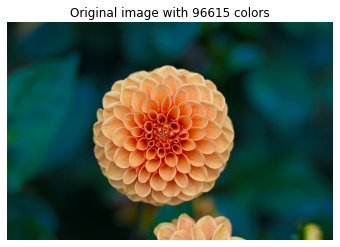

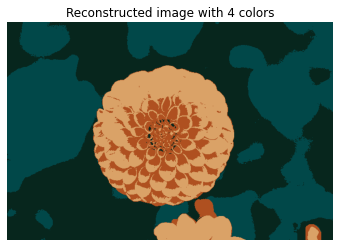

In [13]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_,labels,w,h));

## Principal Component Analysis (PCA)

In [14]:
#import PCA & iris data
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [15]:
iris=load_iris()

X=iris.data
y=iris.target
target_names=iris.target_names

In [16]:
pca=PCA(n_components=2)
X_r=pca.fit(X).transform(X)

In [17]:
print(f'Explained variance ratio from PCA:{pca.explained_variance_ratio_}')

Explained variance ratio from PCA:[0.92461872 0.05306648]


In [ ]:
#first principal component explain 92% of the variance &the second one is 5% =>total 97% variance is explained with 2 components

Text(0.5, 1.0, 'PCA of iris Dataset')

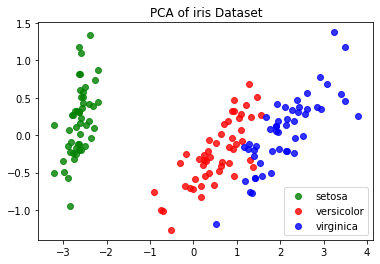

In [21]:
#plot data
colors=['green','red','blue']
plt.figure()
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],color=color,alpha=0.8,label=target_name)
plt.legend()
plt.title('PCA of iris Dataset')